In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


In [2]:
transaction_data=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/shared/homeworks/python_ds_miniprojects/5/transaction_data.csv', parse_dates=['date'])


In [3]:
transaction_data.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [4]:
transaction_data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?
- **Как делать это задание?**
    
    Выведите размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
    
- **Как получить число пропущенных значений?**
    
    Используйте метод `isna` в связке с `sum`
    
- **Что делает isna?**
    
    Метод `isna` переводит каждое значение в `True`, если оно пропущено (NA), и в `False`, если оно не пропущено
    
- **Зачем складывать логические значения?**
    
    В питоне `True` кодируется как 1, а `False` как 0 - не стоит использовать сами логические значения в арифметике, но для анализа серий (число пропущенных значений, доля оставшихся клиентов) это удобный чит
    
- **Краткая сводка**
    
    Чтобы быстро взглянуть на информацию о распределении данных, можно использовать метод `describe`
    
     Например,
    
    ```python
    df.describe()
    ```
    
    Выведет эту информацию для колонок `df`    

In [5]:
transaction_data.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


In [6]:
transaction_data.isnull().isna().sum()

date           0
name           0
transaction    0
dtype: int64

Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)
- **Как узнать какие значения принимает колонка?**
    
    Можно воспользоваться методом `unique`
    
- **Не работает!**
    
    А вы точно применили его к колонке датафрэйма, а не ко всему датафрэйму? То есть вместо
    
    ```python
    df.unique()
    ```
    
    нужно написать
    
    ```python
    df.my_column.unique()
    ```
    
- **Как узнать сколько наблюдений относятся к тому или иному значению колонки?**
    
    Используйте метод `value_counts` от этой колонки
    
- **Построение барплота**
    
    Для построения нужного графика импортируйте `seaborn` и вызовите `sns.barplot`, указав там нужные x и y. Например,
    
    ```python
    sns.barplot(x=df.col_x, y=df.col_y)
    ```
    
    построит график с соответствующими координатами x и y из колонок `col_x` и `col_y` для столбиков.
    
    Альтернативно можно указать в x и y только названия нужных колонок в кавычках, а также передать в `data` переменную с датафрэймом    

In [7]:
tr = transaction_data.transaction.value_counts()

In [8]:
tr.unique

<bound method Series.unique of successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64>

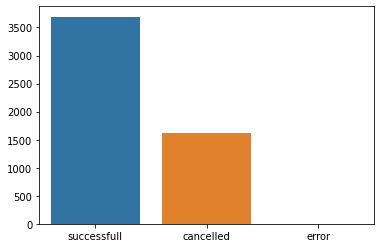

In [9]:
sns.barplot(x=tr.index, y=tr.values)
#index и values подсчитывает и выводит данные

In [10]:
tr.value_counts()

1619    1
4       1
3692    1
Name: transaction, dtype: int64

In [11]:
tr['error']
#Сколько произошло ошибок? 

4

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций
- **Как решать это задание?**
    
    Отфильтруйте данные, оставив только транзакции со значением `successfull` в колонке `transaction`. Потом сгруппируйте данные по имени клиента и посчитайте число транзакций (число строк) для каждого клиента. Далее нарисуйте распределение этой величины с помощью функции `sns.distplot`
    
- **Как визуализировать распределение?**
    
    Используйте функцию `sns.distplot`, которая принимает серию (колонку датафрэйма). К примеру,
    
    ```python
    sns.distplot(df.column1)
    ```
    
    Нарисует распределение значений из колонки `column1`
    
- **Как получить точные числа для задачи?**
    
    Чтобы быстро взглянуть на информацию о распределении данных, можно использовать метод `describe`, например,
    
    ```python
    df.describe()
    ```
    
    Выведет эту информацию для колонок `df`

In [12]:
tr_full = transaction_data.query('transaction == "successfull"')\
                .groupby('name', as_index=False)\
                .size()

In [13]:
tr_full.head()

,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


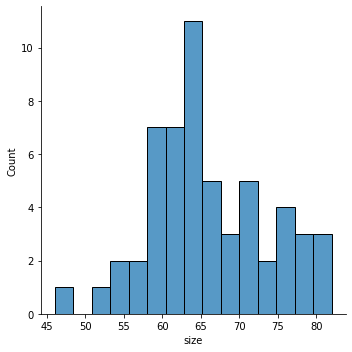

In [14]:
sns.displot(data=tr_full, x='size', bins=15)

К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций
Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем.

Новые данные сохранены в df.
- **Как решать это задание?**
    
    Для начала сгруппируйте данные по имени пользователя и минуте и посчитайте число транзакций для каждого пользователя в каждую минуту. Далее сделайте сводную таблицу с помощью метода `pivot`, указав какие колонки чем являются (`index`, `columns`, `values`). После этого заполните пропущенные значения нулями
    
- **Как сделать сводную таблицу?**
    
    Для создания сводной таблички вам нужен датафрэйм с 3-мя колонками - значения одной станут индексом, значения другой - колонками, а значения третьей распределятся по получающейся табличке. То есть
    
    ```python
    df.pivot(index='index_column', columns='columns_column', values='values_column')
    ```
    
    вернёт сводную таблицу, где значения `index_column` стали новым индексом, значения `columns_column` стали новыми столбцами, а значения `values_column` остались значениями в этой новой таблице.
    
    Размерность новой таблицы - число уникальных значений в `index_column` на число уникальных значений в `columns_column`. Если для комбинации значений `index_column` и `columns_column` не было значения в исходном датафрэйме (строки с такой комбинацией `index_column` и `columns_column` просто не было), в такой ячейке сводной таблицы будет пропущенное значение
    
- **Как заполнить пропуски нулями?**
    
    Тут пригодится метод `fillna`, принимающий аргумент, который он будет ставить вместо пропущенных значений. Например,
    
    ```python
    df.fillna(144)
    ```
    
    вернёт датафрэйм, где вместо пропусков будет стоять 144

In [26]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/transaction_data_updated.csv', parse_dates=['date'])

In [27]:
trans_per_minute = df.groupby(['name', 'minute'], as_index=False).size()
user_vs_minute_pivot = trans_per_minute.pivot(index='minute', columns='name', values='size')
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)

Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).

Например:

date                name               transaction  minute  true_minute
2020-03-02 00:37:20 Ekaterina_Petrova  cancelled    37      37
2020-03-02 01:06:14 Ekaterina_Smirnova successfull  6       66


Данные записаны в df , колонка date прочитана как дата.
- **Как сделать это задание?**
    
    Полное число минут является суммой минут во времени и часов во времени, умноженных на 60. Поэтому нужно взять число минут из времени и прибавить число часов, умноженных на 60, а затем поместить результат в колонку `true_minute`
    
- **Как взять минуты или часы?**
    
    У временных колонок есть атрибут `dt`, где хранятся вещи, связанные со временем. Минутная и часовая части времени лежат в атрибутах `minute` и `hour` соответственно. Например
    
    ```python
    df.date.dt.minute
    ```
    
    Вернёт колонку с минутами во времени
    
- **Как получить число транзакций по минутам?**
    
    Для этого сгруппируйте по минутам и посчитайте количество строк в каждой группе методом `count`. Также в помощь метод `.value_counts()`, с которым и группировать не надо. Обратите внимание, что это задание проще решать **без использования сводной таблицы**.
    
- **Построение барплота**
    
    Для построения нужного графика импортируйте `seaborn` и вызовите `sns.barplot`, указав там нужные x и y. Например,
    
    ```python
    sns.barplot(x=df.col_x, y=df.col_y)
    ```
    
    построит график с соответствующими координатами x и y из колонок `col_x` и `col_y` для столбиков.
    
    Альтернативно можно указать в x и y только названия нужных колонок в кавычках, а также передать в `data` переменную с датафрэймом


In [31]:
df

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [29]:
df.date.describe(datetime_is_numeric=True)

count                             5315
mean     2020-03-02 00:43:56.628974592
min                2020-03-02 00:00:00
25%         2020-03-02 00:21:50.500000
50%                2020-03-02 00:43:26
75%         2020-03-02 01:06:22.500000
max                2020-03-02 01:29:05
Name: date, dtype: object

In [30]:
df['true_minute'] = df.date.dt.minute + df.date.dt.hour *60

In [17]:
minute_trans = user_vs_minute_pivot.sum(axis=1)


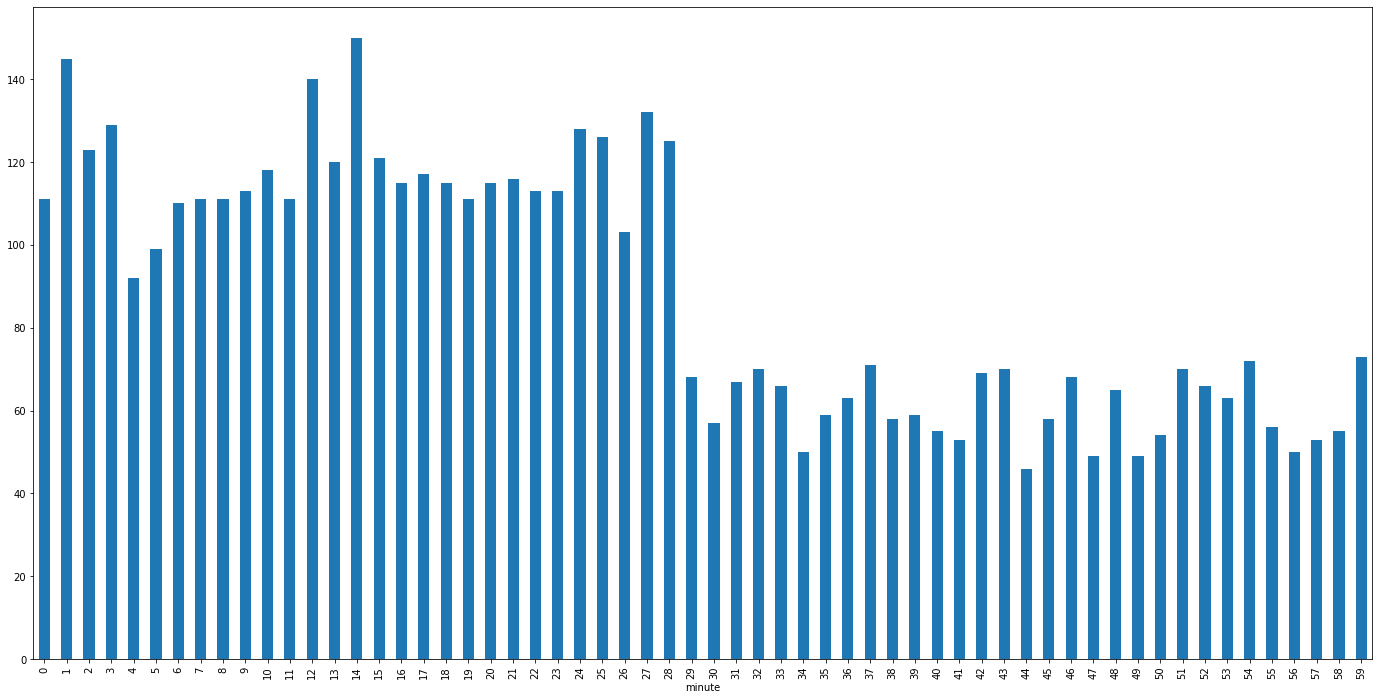

In [32]:
minute_trans.plot.bar(figsize=(24,12))

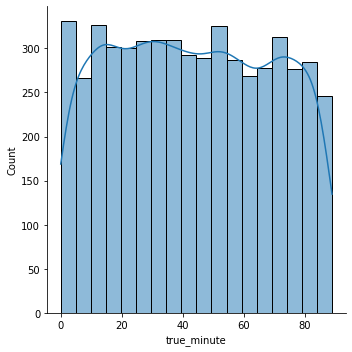

In [33]:
sns.displot(data=df, x='true_minute', kde=True)